# Import libs

In [1]:
import torch

from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions, TableFormerMode


In [2]:
print(torch.version.cuda)  # Check if CUDA version is detected
print(torch.cuda.is_available())  # Should return True if everything is set up

12.4
True


# Pipeline Options

In [3]:
pipeline_options = PdfPipelineOptions()
pipeline_options.do_ocr = True
pipeline_options.do_table_structure = True
pipeline_options.table_structure_options.do_cell_matching = True
pipeline_options.table_structure_options.mode = TableFormerMode.ACCURATE


# Convert

In [4]:
source = "policies/income_travel_insurance_2024.pdf"  # document per local path or URL

In [5]:
doc_converter = DocumentConverter(
    format_options={InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)}
)

result = doc_converter.convert(source)

print(result.document.export_to_markdown())

c:\Users\choyd\OneDrive\Documents\projects\agents_recsys\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 9 files: 100%|██████████| 9/9 [00:00<?, ?it/s]


Income made yours

## Travel Insurance

Get comprehensive coverage for your trips with Income's Travel Insurance!

TRAVEL INSURANCE

<!-- image -->

<!-- image -->

Travel with confidence knowing you are well-protected with comprehensive coverage from Income's Travel Insurance.

| Coverage for  overseas transport and accommodation  expenses due to trip cancellation or trip shortening .                            |
|---------------------------------------------------------------------------------------------------------------------------------------|
| Coverage for you and your family with unlimited number of children insured when you opt for our  Family cover 1                       |
| Coverage for  adventurous activities 2                                                                                                |
| Coverage for  travel delay 3  not caused by you                                                                                       |
| Coverage for medical expense

# Manually inspecting output (income_travel_insurance_2024)

Section 9 looks good:

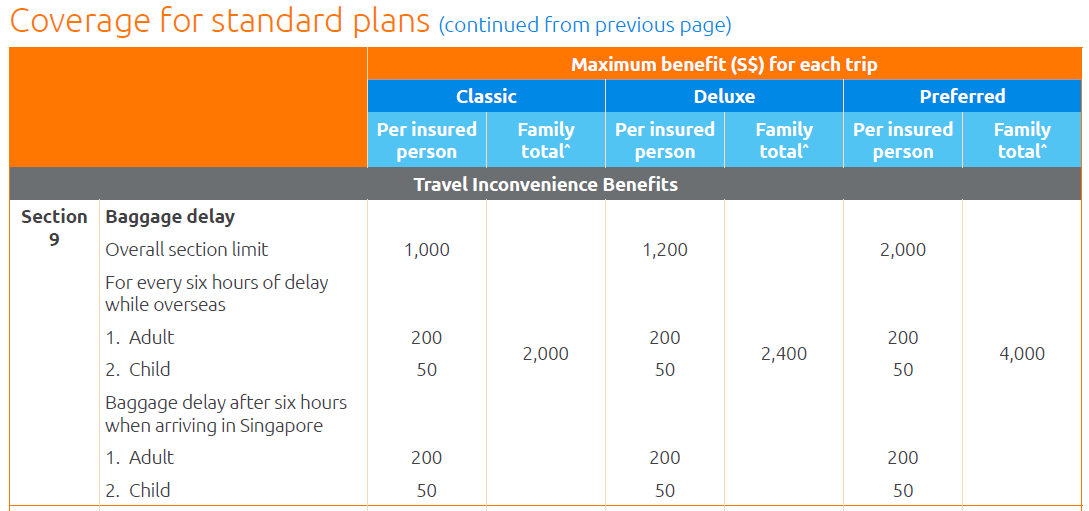

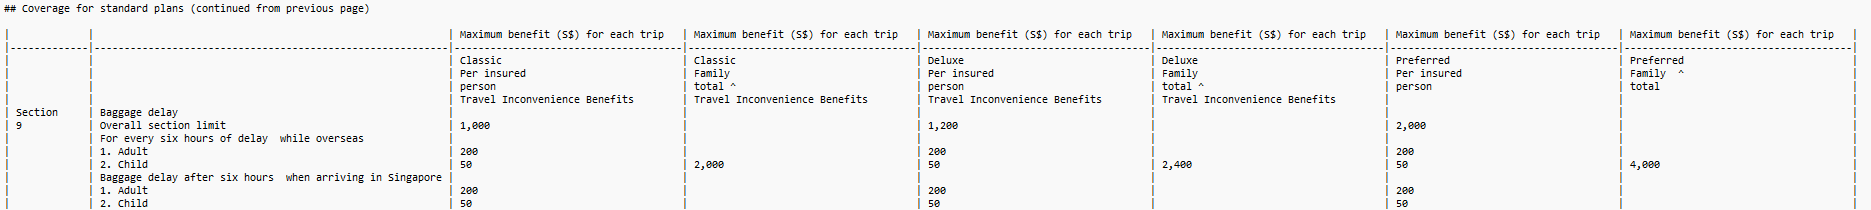

Section 13 > Scale of compensation: The output doesn't match the source

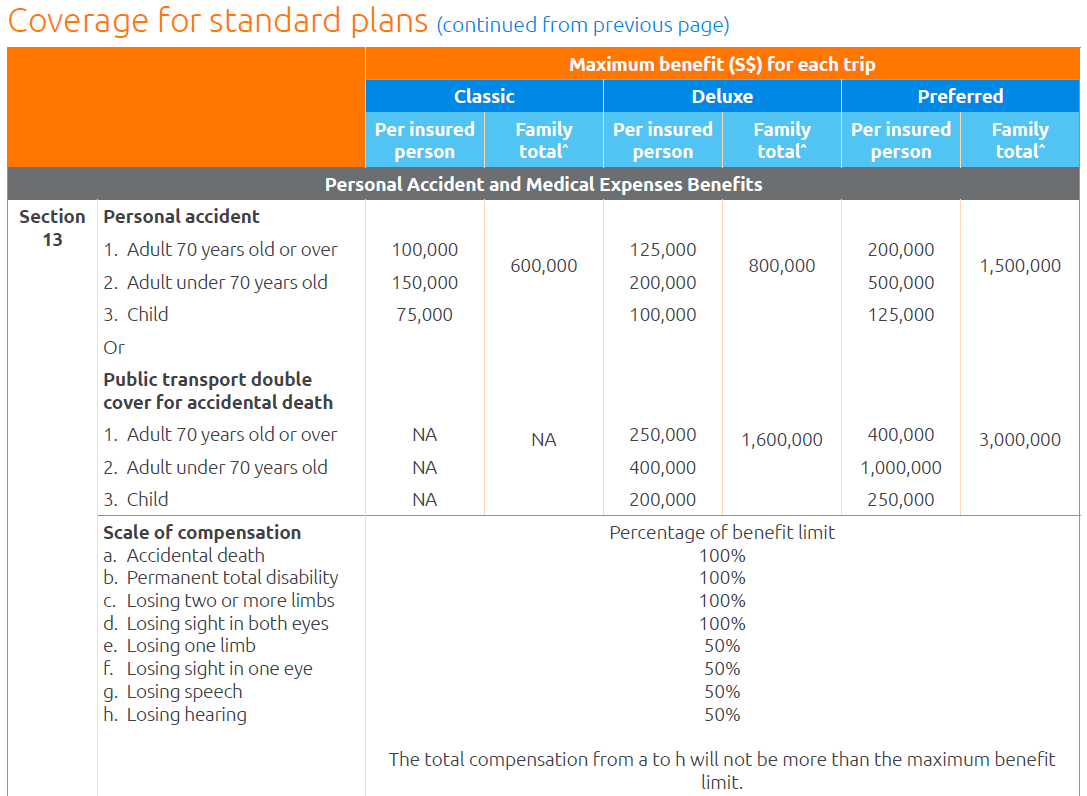

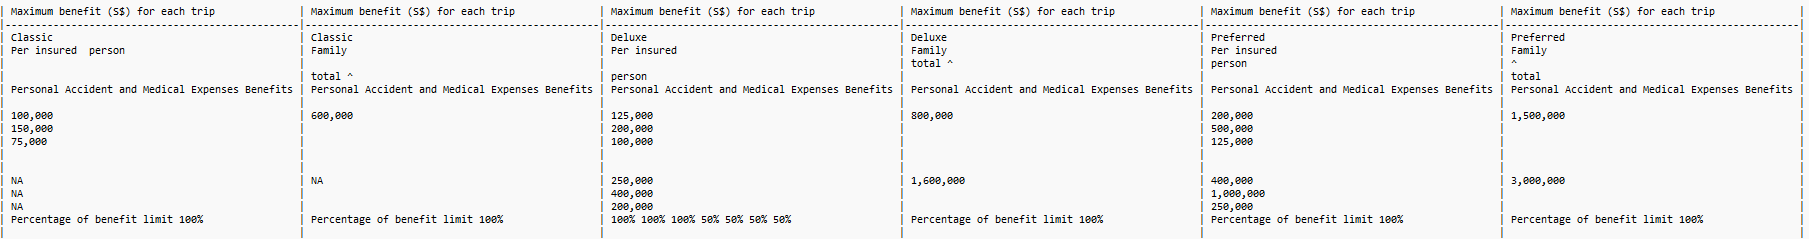

## Save to local dir

In [6]:
with open("data/income_travel_insurance_2024.txt", "w", encoding="utf-8") as file:
    file.write(result.document.export_to_markdown())

# Convert another policy

In [7]:
source = "policies/ge_travel_insurance_2024.pdf"

doc_converter = DocumentConverter(
    format_options={InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)}
)
result = doc_converter.convert(source)
print(result.document.export_to_markdown())


Fetching 9 files: 100%|██████████| 9/9 [00:00<?, ?it/s]


<!-- image -->

<!-- image -->

## Travel Insurance

A comprehensive travel insurance provides you a piece of mind on your journey

<!-- image -->

Wherever your destination is and whether you are travelling alone or with family, for business or on holiday, Travel insurance that provides the protection that you need while traveling.

Travel Insurance will provide you with a 24/7 worldwide coverage to help you manage any problems you may encounter while travelling.

Frequent travellers can also save time and money with an annual plan that offers peace of mind for all the trips made during the year.

## Why choose travel insurance?

- · Hassle-free annual plan
- · Family coverage available with no limit to the number of children included
- · Payment of overseas or out-of-town medical costs and additional expenses
- · Access to a 24-hour Across Asia Assist worldwide
- · Provides for a coverage for visits by relative/friend when the Insured Person is hospitalized abroad and cannot be evacu

# Manually inspect (ge_travel_insurance_2024)

Section 8, 9, 10 looks ok.

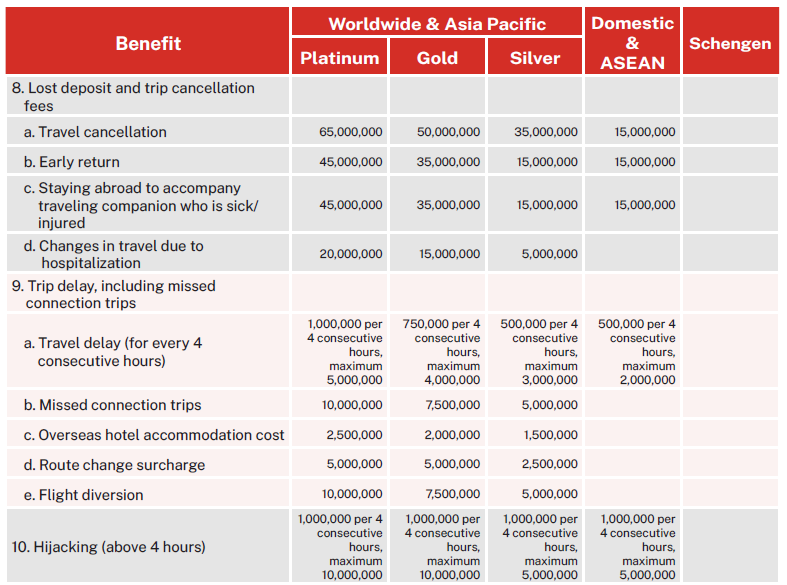

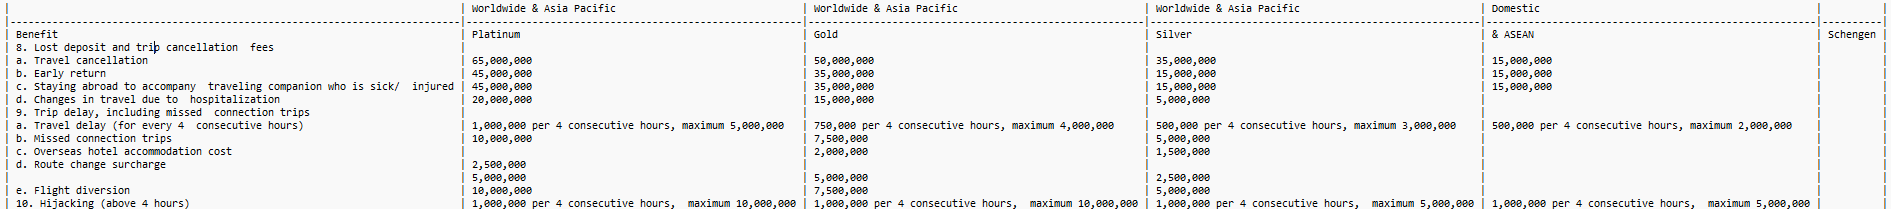

Here, docling struggles with the grey area:

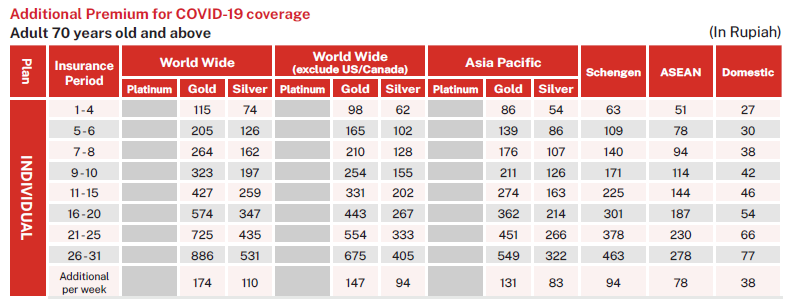

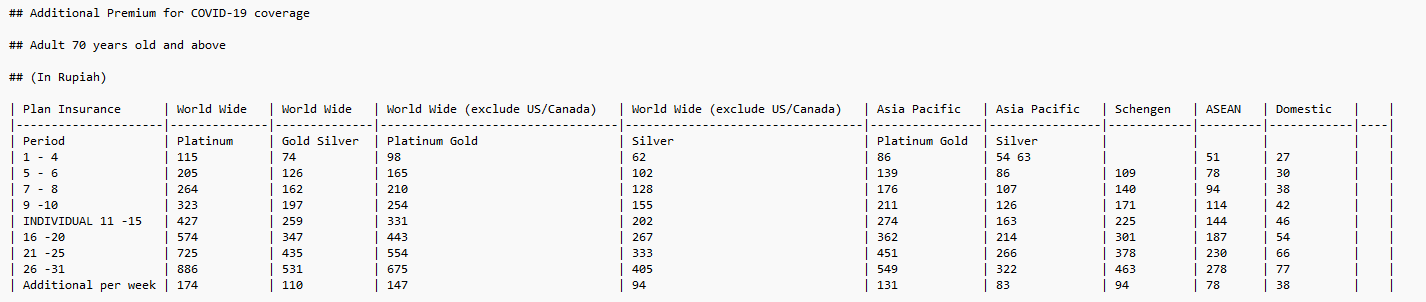

## Save to local dir

In [8]:
with open("data/ge_travel_insurance_2024.txt", "w", encoding="utf-8") as file:
    file.write(result.document.export_to_markdown())